# Exercise 5

Alissa Trujillo<br>
July 5, 2022<br>
DSC 530<br>
Week 5: Distributions

## Exercise 5-1

In [2]:
import brfss
import thinkstats2
import scipy

In [3]:
df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

weight_cdf = thinkstats2.Cdf(weights, label="weights")

In [4]:
mu = 178
sigma = 7.7
weights = scipy.stats.norm(loc = mu, scale = sigma)

In [5]:
min = weights.cdf(177.8)
max = weights.cdf(185.4)

max - min

0.3420946829459531

34% of the US male population falls in the range betwen 5'10" (177.8cm) and 6'1" (185.4cm).

## Exercise 5-2

**Plotting a Pareto distribution of height.**

In [8]:
alpha = 1.7
xmin = 1
pareto_heights = scipy.stats.pareto(b = alpha, scale = xmin)

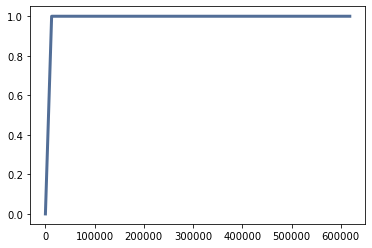

In [34]:
import thinkplot

xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 1, 618300)

thinkplot.Plot(xs, ps)

**Mean height in a Pareto distribution**

In [7]:
pareto_heights.mean()

2.428571428571429

The mean height in a Pareto-distributed world is 2.42 meters, which is roughly 7'11". 

**Fraction of the population shorter than the mean**

In [35]:
pareto_heights.cdf(pareto_heights.mean())

0.778739697565288

Our model predicts that 78% of the population will fall under the mean height, which is 7'11". This means it predicts 22% of the population to be taller than 7'11".

**How many people are taller than 1km?**

In [18]:
pareto_heights.sf(1000)*7e9

55602.97643069972

Out of the 7 billion people in the world, this pareto model predicts that roughly 55,603 people will be taller than 1km, which equates to 3280'10", which is absolutely not an attainable height.

**How tall is the tallest person on Earth?**

In [33]:
pareto_heights.sf(618300)*7e9

1.0001366009014565

Our pareto model predicts that the tallest person on Earth would be roughly 618300km tall, which equates to 2028543'4".

## Exercise 6-1

In [38]:
import hinc
import hinc2

This distribution makes a number of assumptions, including that the upper bound of income is one million dollars (10^6) and that incomes in each income range are equally spaced. We will take a look to see if this upper bound assumption has a profound effect on the analysis.

In [56]:
def InterpolateSample(df, log_upper=6.0):
    df['log_upper'] = np.log10(df.income)

    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    df.loc[41, 'log_upper'] = log_upper
    
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    log_sample = np.concatenate(arrays)
    return log_sample


**Log 6 Upper Bound ($1,000,000)**

In [93]:
import numpy as np
from hinc import ReadData

wealth_df = ReadData(filename='hinc06.csv')
wealth_log_sample = InterpolateSample(wealth_df, log_upper=6.0)

In [67]:
wealth_log_cdf = thinkstats2.Cdf(wealth_log_sample)

In [61]:
wealth_sample = np.power(10, wealth_log_sample)

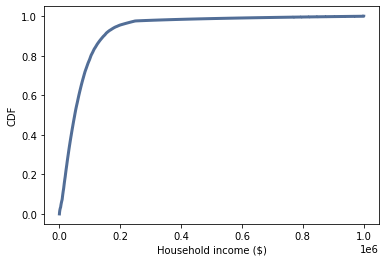

In [64]:
wealth_cdf = thinkstats2.Cdf(wealth_sample)
thinkplot.Cdf(wealth_cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

**Mean**

In [66]:
wealth_sample.mean()

74278.7075311872

The mean income in this sample is $74,278

**Median**

In [69]:
np.median(wealth_sample)

51226.93306562372

The median income in this sample is $51,226

**Skewness**

In [74]:
from scipy.stats import skew

skew(wealth_sample)

4.949920244429584

**Log 7 Upper-Bound ($10,000,000)**

In [78]:
from hinc import ReadData

wealth_df7 = ReadData(filename='hinc06.csv')
wealth_log_sample7 = InterpolateSample(wealth_df7, log_upper=7.0)

In [79]:
wealth_log_cdf7 = thinkstats2.Cdf(wealth_log_sample7)

In [80]:
wealth_sample7 = np.power(10, wealth_log_sample7)

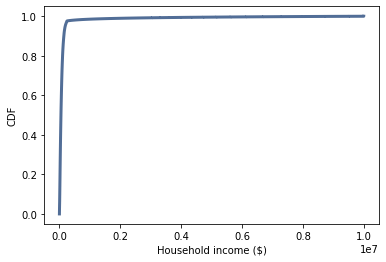

In [81]:
wealth_cdf7 = thinkstats2.Cdf(wealth_sample7)
thinkplot.Cdf(wealth_cdf7)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

**Mean**

In [82]:
wealth_sample7.mean()

124267.39722164697

The mean income in this sample is $124,267

**Median**

In [85]:
np.median(wealth_sample7)

51226.93306562372

The median income in this sample is $51,226

**Skewness**

In [87]:
skew(wealth_sample7)

11.603690267537788

In [95]:
wealth_df

,income,freq,cumsum,ps,log_upper,log_lower
0,4999.0,4204,4204,0.034330,3.698883,3.000000
1,9999.0,4729,8933,0.072947,3.999957,3.698883
2,14999.0,6982,15915,0.129963,4.176062,3.999957
3,19999.0,7157,23072,0.188407,4.301008,4.176062
4,24999.0,7131,30203,0.246640,4.397923,4.301008
5,29999.0,6740,36943,0.301679,4.477107,4.397923
6,34999.0,6354,43297,0.353566,4.544056,4.477107
7,39999.0,5832,49129,0.401191,4.602049,4.544056
8,44999.0,5547,54676,0.446488,4.653203,4.602049
9,49999.0,5254,59930,0.489392,4.698961,4.653203


**What fraction of households report a taxable income below the mean?**